In [40]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.fftpack
import scipy.optimize

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


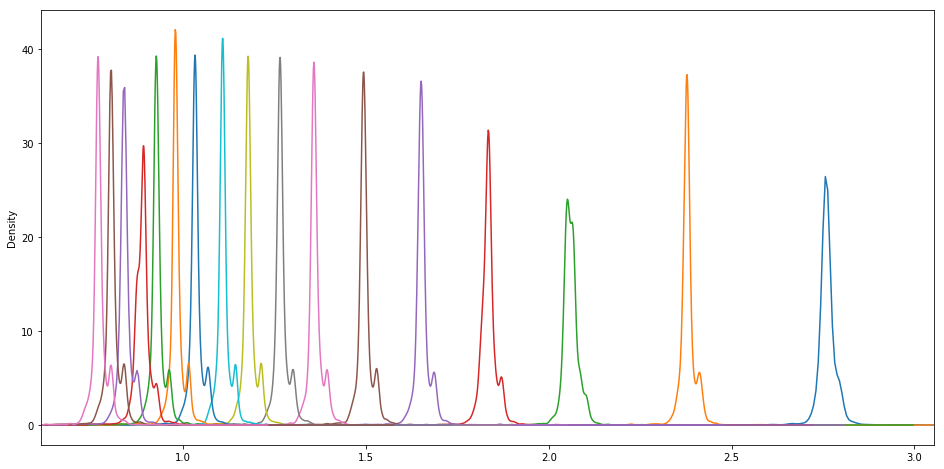

In [41]:
distances = [83, 100, 116, 133, 149, 166, 183, 199, 216, 233, 249, 265, 281, 298, 314, 331, 346]
d = np.array(distances)*1.0
V = np.array([])
Vstd = np.array([])
Vstd50 = np.array([])
P = np.array([0, 39, 78, 117, 156, 195, 234, 273, 312, 351, 390, 429, 468, 507, 546, 585, 624])

fx = np.linspace(0.0, 1.0/(2.0*4.999/5000), 5000/2)
fy = np.zeros(5000)

for i in range(len(distances)):
    df=pd.read_csv(str(distances[i])+'mm/anag2.csv', header=None, squeeze = True)*5/4095
    V = np.append(V,np.mean(df[1:]))
    Vstd = np.append(Vstd,np.mean(df[1:]))
    
    V_50ms=[np.mean(df[1:50])]
    
    for j in range(50):
        V_50ms.append(np.mean(df[50*(j+1):50*(j+2)]))
    
    Vstd50 = np.append(Vstd50,np.std(V_50ms))
    
    
    df.plot.kde(figsize=(16,8), xlim=(500*5/4095, 2500*5/4095))
    fy = fy + scipy.fftpack.fft(df.values)

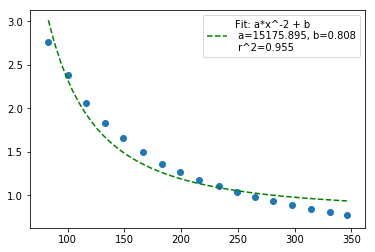

0.954653416555907


In [42]:
dfit = np.linspace(distances[0], distances[-1], 50)

def rsi_fun(x, a, b):
    return a * x**-2 + b

popt_V, pconv_V = scipy.optimize.curve_fit(rsi_fun, d, V)
ss_tot_V = np.sum((V-np.mean(V))**2)
residuals_V = V- rsi_fun(d, *popt_V)
ss_res_V = np.sum(residuals_V**2)
r_squared_V = 1 - (ss_res_V / ss_tot_V)

plt.plot(dfit, rsi_fun(dfit, *popt_V), 'g--', 
         label='Fit: a*x^-2 + b \n a=%5.3f, b=%5.3f'%tuple(popt_V)+'\n r^2=%5.3f'%r_squared_V)
plt.scatter(d,V)
plt.legend()
plt.show()

print(r_squared_V)

/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


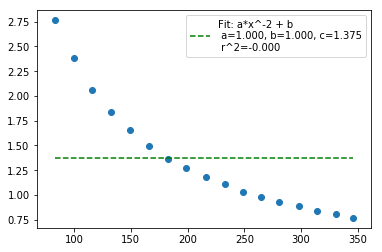

-2.220446049250313e-16


In [43]:
def rsi_fun(x, a, b, c):
    return a * np.exp(-b*x) + c

popt_V, pconv_V = scipy.optimize.curve_fit(rsi_fun, d, V)
ss_tot_V = np.sum((V-np.mean(V))**2)
residuals_V = V- rsi_fun(d, *popt_V)
ss_res_V = np.sum(residuals_V**2)
r_squared_V = 1 - (ss_res_V / ss_tot_V)

plt.plot(dfit, rsi_fun(dfit, *popt_V), 'g--', 
         label='Fit: a*x^-2 + b \n a=%5.3f, b=%5.3f, c=%5.3f'%tuple(popt_V)+'\n r^2=%5.3f'%r_squared_V)
plt.scatter(d,V)
plt.legend()
plt.show()

print(r_squared_V)

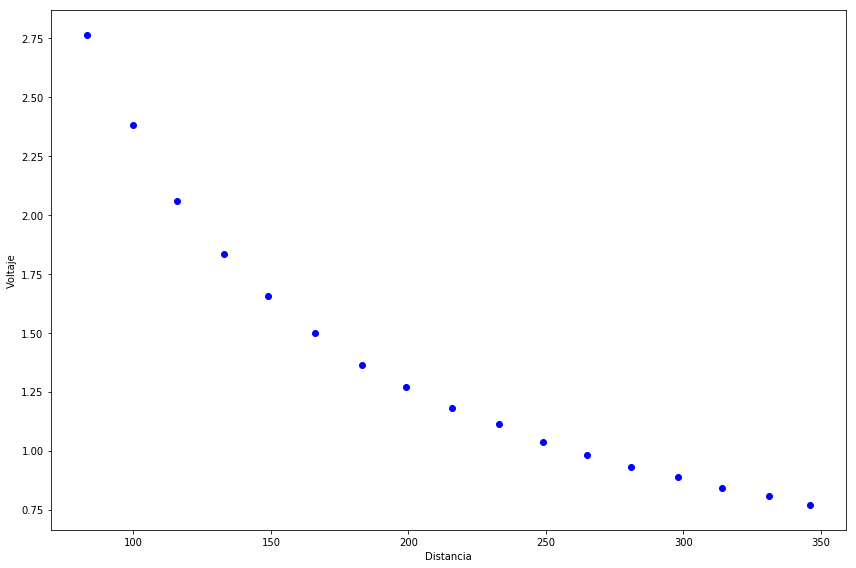

In [20]:
fig, ax = plt.subplots(1, 1, sharex=False, figsize=(12,8))

ax.scatter(d,V, color='blue')
ax.set_xlabel('Distancia')
ax.set_ylabel('Voltaje')

fig.tight_layout()

In [10]:
V*3/4095

array([1.65709215, 1.4283604 , 1.23607505, 1.10129792, 0.99258753,
       0.89806533, 0.81710144, 0.76103909, 0.70874175, 0.66679783,
       0.62145997, 0.58932402, 0.55777221, 0.53400116, 0.50519159,
       0.48362874, 0.46281711])

In [11]:
Vstd50*3/4095

array([0.00197215, 0.00198886, 0.00396324, 0.00343457, 0.00223086,
       0.00147145, 0.001934  , 0.00200201, 0.00165612, 0.00163709,
       0.00198086, 0.00158059, 0.00172348, 0.00448601, 0.00284882,
       0.00170453, 0.00183936])

In [7]:
V-Vstd50

array([2259.23880365, 1946.99715137, 1681.83263136, 1498.58347027,
       1351.8368521 , 1223.85063854, 1112.70355459, 1036.08562502,
        965.17188589,  907.94441329,  845.58898595,  802.26977765,
        759.00651819,  722.78818492,  685.69788357,  657.82654346,
        629.23461772])

In [8]:
V+Vstd50

array([2264.62276867, 1952.4267334 , 1692.65226562, 1507.95983839,
       1357.92710069, 1227.86770513, 1117.9833828 , 1041.55110232,
        969.69308711,  912.41365832,  850.99673119,  806.58479327,
        763.71162544,  735.03497971,  693.47515103,  662.47991783,
        634.25608042])